# Social Media Stock Prices, 2012-2022

In [1]:
import seaborn as sns
sns.set()

Questions, would it be possible to find correlations in these prices to general market prices (nasdaq, etc). 
How do their prices compare to that over other large tech companies? Aaple, google, nvidia etc. 

In this notebook, we will take a look at the closing price of Facebook/Meta, Twitter, and Snapchat over the past 10 years. 
The dataset is from https://www.kaggle.com/datasets/prasertk/major-social-media-stock-prices-20122022

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
prices = pd.read_csv('stocks12-22.csv')

In [4]:
prices.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2012-05-18,FB,38.230000,38.230000,45.000000,38.000000,42.049999,573576400.0
1,2012-05-21,FB,34.029999,34.029999,36.660000,33.000000,36.529999,168192700.0
2,2012-05-22,FB,31.000000,31.000000,33.590000,30.940001,32.610001,101786600.0
3,2012-05-23,FB,32.000000,32.000000,32.500000,31.360001,31.370001,73600000.0
4,2012-05-24,FB,33.029999,33.029999,33.209999,31.770000,32.950001,50237200.0


In [5]:
prices.Symbol.unique()

array(['FB', 'TWTR', 'ETSY', 'SNAP', 'PINS'], dtype=object)

In [6]:
#subset the data on facebook twitter and snapchat only
data = prices[prices.Symbol.isin(['FB','TWTR','SNAP'])]

In [7]:
data.describe()

,Adj Close,Close,High,Low,Open,Volume
count,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5.891000e+03
mean,80.798693,80.798693,81.921658,79.647346,80.793823,2.638685e+07
std,82.539362,82.539362,83.437040,81.590313,82.505033,2.363005e+07
min,4.990000,4.990000,5.140000,4.820000,4.960000,3.285700e+06
25%,23.770000,23.770000,24.320000,23.235000,23.795000,1.433865e+07
50%,44.349998,44.349998,45.320000,43.419998,44.380001,1.993400e+07
75%,116.485001,116.485001,117.579998,115.314999,116.619999,2.946130e+07
max,382.179993,382.179993,384.329987,378.809998,381.679993,5.735764e+08


In [8]:
data.Symbol.value_counts()

FB      2488
TWTR    2118
SNAP    1285
Name: Symbol, dtype: int64

In [9]:
data.dtypes

Date          object
Symbol        object
Adj Close    float64
Close        float64
High         float64
Low          float64
Open         float64
Volume       float64
dtype: object

In [10]:
data.isnull().sum()

Date         0
Symbol       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [12]:
data.loc[:,'Date'] = pd.to_datetime(data['Date'], infer_datetime_format = True)

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2012-05-18,FB,38.230000,38.230000,45.000000,38.000000,42.049999,573576400.0
1,2012-05-21,FB,34.029999,34.029999,36.660000,33.000000,36.529999,168192700.0
2,2012-05-22,FB,31.000000,31.000000,33.590000,30.940001,32.610001,101786600.0
3,2012-05-23,FB,32.000000,32.000000,32.500000,31.360001,31.370001,73600000.0
4,2012-05-24,FB,33.029999,33.029999,33.209999,31.770000,32.950001,50237200.0
...,...,...,...,...,...,...,...,...
8389,2022-04-05,TWTR,50.980000,50.980000,54.570000,50.560001,53.849998,217520100.0
8391,2022-04-05,SNAP,38.250000,38.250000,39.799999,37.820000,39.500000,22261200.0
8393,2022-04-06,FB,223.300003,223.300003,228.990005,221.410004,226.910004,28969100.0
8394,2022-04-06,TWTR,50.770000,50.770000,52.869999,49.299999,50.040001,158865600.0


In [14]:
data.set_index('Date',inplace = True)

In [15]:
dataFB = data[data.Symbol == 'FB']
dataTWTR = data[data.Symbol == 'TWTR']
dataSNAP = data[data.Symbol == 'SNAP']

In [16]:
dataFB.head()

,Symbol,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2012-05-18,FB,38.230000,38.230000,45.000000,38.000000,42.049999,573576400.0
2012-05-21,FB,34.029999,34.029999,36.660000,33.000000,36.529999,168192700.0
2012-05-22,FB,31.000000,31.000000,33.590000,30.940001,32.610001,101786600.0
2012-05-23,FB,32.000000,32.000000,32.500000,31.360001,31.370001,73600000.0
2012-05-24,FB,33.029999,33.029999,33.209999,31.770000,32.950001,50237200.0


In [55]:
df.head()

,Symbol,Close
Date,,
2012-05-18,FB,38.230000
2012-05-21,FB,34.029999
2012-05-22,FB,31.000000
2012-05-23,FB,32.000000
2012-05-24,FB,33.029999


In [17]:
df = data[['Symbol','Close']]
df.dtypes

Symbol     object
Close     float64
dtype: object

In [18]:
dataFB.dtypes

Symbol        object
Adj Close    float64
Close        float64
High         float64
Low          float64
Open         float64
Volume       float64
dtype: object

In [58]:
dataFB.head()

,Symbol,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2012-05-18,FB,38.230000,38.230000,45.000000,38.000000,42.049999,573576400.0
2012-05-21,FB,34.029999,34.029999,36.660000,33.000000,36.529999,168192700.0
2012-05-22,FB,31.000000,31.000000,33.590000,30.940001,32.610001,101786600.0
2012-05-23,FB,32.000000,32.000000,32.500000,31.360001,31.370001,73600000.0
2012-05-24,FB,33.029999,33.029999,33.209999,31.770000,32.950001,50237200.0


In [57]:
dataFB.describe()

,Adj Close,Close,High,Low,Open,Volume
count,2488.000000,2488.000000,2488.000000,2488.000000,2488.000000,2.488000e+03
mean,147.413416,147.413416,149.151117,145.584783,147.375719,3.089781e+07
std,89.692476,89.692476,90.759329,88.590298,89.652424,2.745763e+07
min,17.730000,17.730000,18.270000,17.549999,18.080000,5.913100e+06
25%,76.050001,76.050001,76.907503,75.070002,76.064999,1.581550e+07
50%,139.930000,139.930000,141.025002,138.909996,139.824997,2.247810e+07
75%,192.782497,192.782497,195.014999,190.055000,192.857506,3.590250e+07
max,382.179993,382.179993,384.329987,378.809998,381.679993,5.735764e+08


Some notes on statistics. fb highs lows. make note on how the dates dont coincide



In [59]:
dataTWTR.describe()

,Adj Close,Close,High,Low,Open,Volume
count,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2.118000e+03
mean,35.549764,35.549764,36.245165,34.891176,35.575708,2.126754e+07
std,14.383712,14.383712,14.675273,14.115253,14.417318,1.720262e+07
min,14.010000,14.010000,14.220000,13.730000,13.950000,3.661100e+06
25%,24.397500,24.397500,24.942501,23.879999,24.372500,1.254365e+07
50%,34.395000,34.395000,35.050001,33.875000,34.495001,1.702640e+07
75%,43.802501,43.802501,44.727500,42.887500,43.895001,2.405795e+07
max,77.629997,77.629997,80.750000,76.050003,78.360001,2.684654e+08


In [60]:
dataSNAP.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1.285000e+03
mean,26.401650,26.401650,27.039103,25.749465,26.409550,2.609069e+07
std,19.780105,19.780105,20.278233,19.265144,19.800023,2.303184e+07
min,4.990000,4.990000,5.140000,4.820000,4.960000,3.285700e+06
25%,13.420000,13.420000,13.690000,13.140000,13.410000,1.520320e+07
50%,16.990000,16.990000,17.209999,16.530001,16.879999,2.076110e+07
75%,38.380001,38.380001,39.590000,37.349998,38.250000,2.870010e+07
max,83.110001,83.110001,83.339996,79.320000,82.000000,3.086025e+08


In [61]:
dataSNAP.head()

,Symbol,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2017-03-02,SNAP,24.480000,24.480000,26.049999,23.500000,24.000000,217048900.0
2017-03-03,SNAP,27.090000,27.090000,29.440001,26.059999,26.389999,148166400.0
2017-03-06,SNAP,23.770000,23.770000,28.250000,23.770000,28.170000,72903000.0
2017-03-07,SNAP,21.440001,21.440001,22.500000,20.639999,22.209999,71857800.0
2017-03-08,SNAP,22.809999,22.809999,23.430000,21.309999,22.030001,49819100.0


In [62]:
dataSNAP.tail()

,Symbol,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2022-03-31,SNAP,35.990002,35.990002,36.869999,35.764999,36.750000,15777700.0
2022-04-01,SNAP,37.389999,37.389999,38.599998,36.200001,36.200001,25272900.0
2022-04-04,SNAP,39.340000,39.340000,39.570000,37.369999,38.250000,25402800.0
2022-04-05,SNAP,38.250000,38.250000,39.799999,37.820000,39.500000,22261200.0
2022-04-06,SNAP,36.470001,36.470001,37.740002,35.639999,37.369999,21549700.0


## Change here

In [19]:
fb = dataFB['Close']
tw = dataTWTR['Close']
sn = dataSNAP['Close']

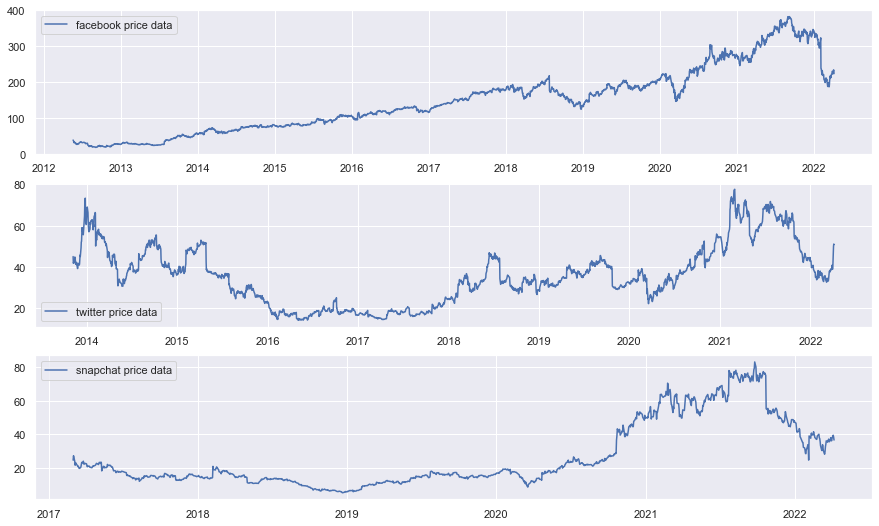

In [21]:
plt.figure(figsize=(15,9))
plt.subplot(311)
plt.plot(fb, label = 'facebook price data')
plt.legend(loc = 'best')
plt.subplot(312)
plt.plot(tw, label = 'twitter price data')
plt.legend(loc = 'best')
plt.subplot(313)
plt.plot(sn, label = 'snapchat price data')
plt.legend(loc = 'best')


In [22]:
all3 = pd.concat([fb,tw,sn], axis = 1)

In [49]:
all3.head()

,Close,Close,Close
Date,,,
2012-05-18,38.230000,NaN,NaN
2012-05-21,34.029999,NaN,NaN
2012-05-22,31.000000,NaN,NaN
2012-05-23,32.000000,NaN,NaN
2012-05-24,33.029999,NaN,NaN


<AxesSubplot:xlabel='Date', ylabel='Close'>

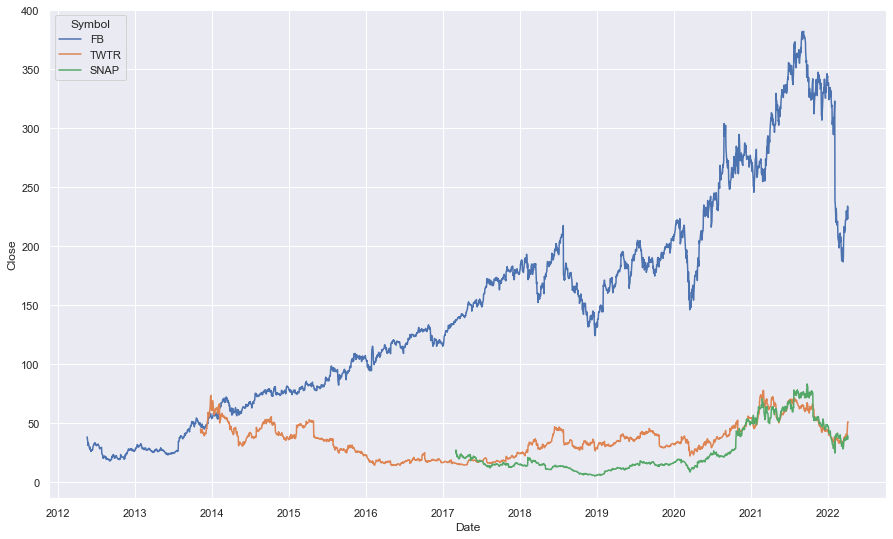

In [23]:
plt.figure(figsize=(15,9))
sns.lineplot(x=df.index, y='Close', hue='Symbol', 
             data=df)

In [89]:
data

,Symbol,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2012-05-18,FB,38.230000,38.230000,45.000000,38.000000,42.049999,573576400.0
2012-05-21,FB,34.029999,34.029999,36.660000,33.000000,36.529999,168192700.0
2012-05-22,FB,31.000000,31.000000,33.590000,30.940001,32.610001,101786600.0
2012-05-23,FB,32.000000,32.000000,32.500000,31.360001,31.370001,73600000.0
2012-05-24,FB,33.029999,33.029999,33.209999,31.770000,32.950001,50237200.0
...,...,...,...,...,...,...,...
2022-04-05,TWTR,50.980000,50.980000,54.570000,50.560001,53.849998,217520100.0
2022-04-05,SNAP,38.250000,38.250000,39.799999,37.820000,39.500000,22261200.0
2022-04-06,FB,223.300003,223.300003,228.990005,221.410004,226.910004,28969100.0


<AxesSubplot:xlabel='Date', ylabel='Volume'>

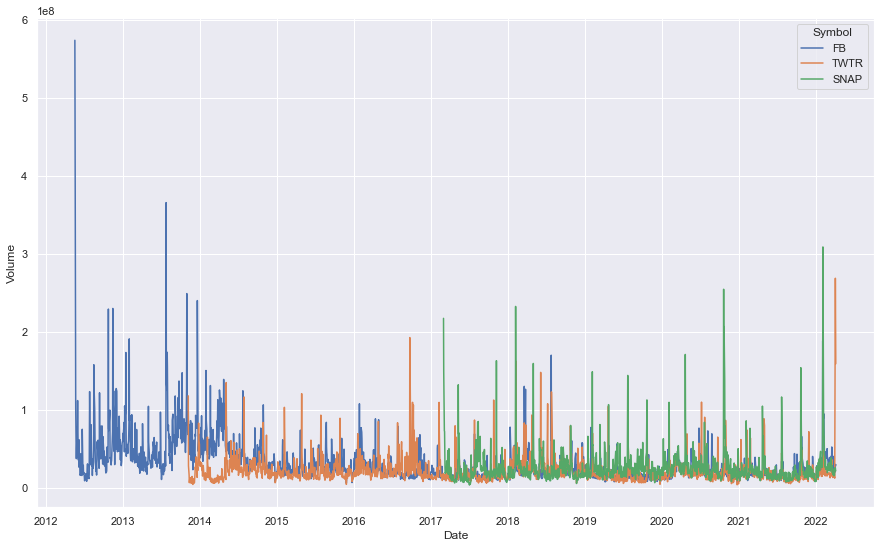

In [24]:
plt.figure(figsize=(15,9))
sns.lineplot(x=data.index, y='Volume', hue='Symbol', 
             data=data)

<AxesSubplot:xlabel='Date', ylabel='Volume'>

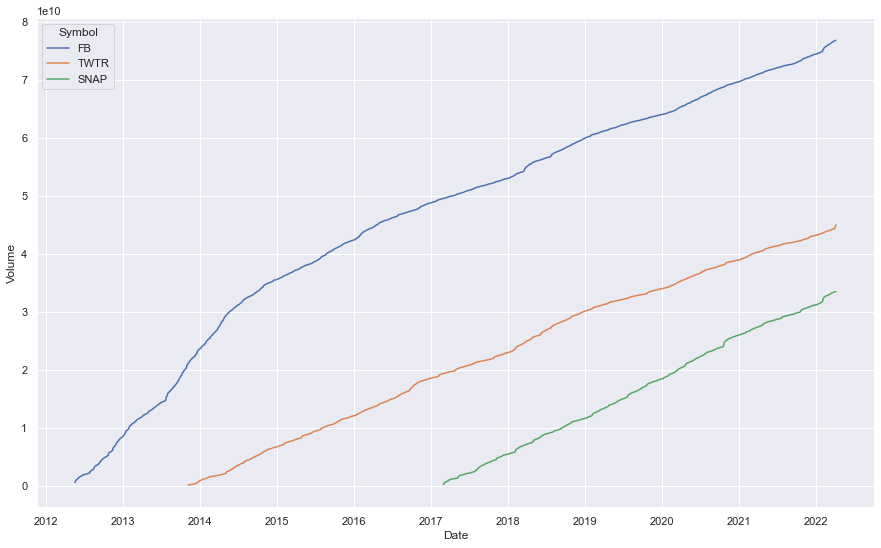

In [25]:
plt.figure(figsize=(15,9))
sns.lineplot(x=data.index, y=data.groupby('Symbol')['Volume'].cumsum(), hue='Symbol', 
             data=data)

In [28]:
nasdaq = pd.read_csv("nas1222.csv")

In [29]:
nasdaq.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-04-17,3002.020020,3052.760010,2999.489990,3042.820068,3042.820068,1555070000
1,2012-04-18,3031.820068,3045.040039,3023.909912,3031.449951,3031.449951,1599470000
2,2012-04-19,3028.199951,3058.719971,2994.939941,3007.560059,3007.560059,1991120000
3,2012-04-20,3023.729980,3034.689941,2999.010010,3000.449951,3000.449951,1935880000
4,2012-04-23,2969.000000,2973.379883,2946.040039,2970.449951,2970.449951,1767360000


In [30]:
nasdaq.loc[:,['Date']] = pd.to_datetime(nasdaq['Date'], infer_datetime_format = True)

In [31]:
nasdaq.set_index('Date',inplace = True)

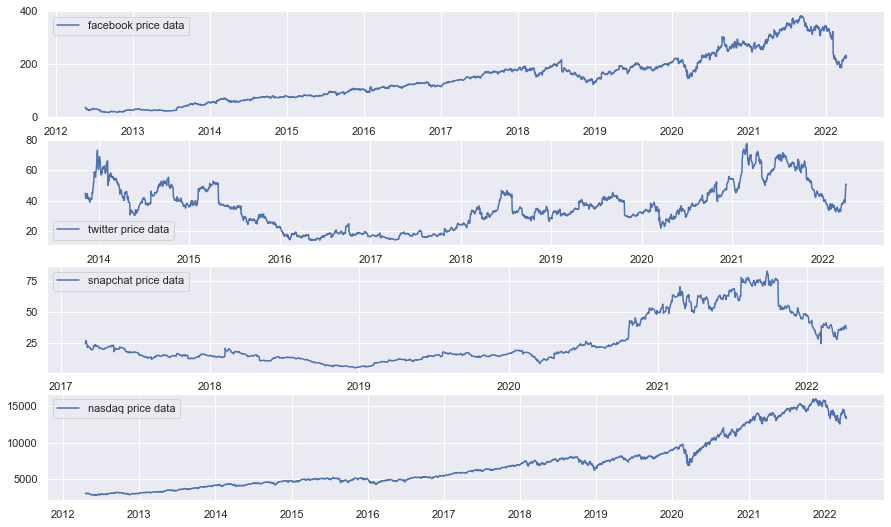

In [32]:
plt.figure(figsize=(15,9))
plt.subplot(411)
plt.plot(fb, label = 'facebook price data')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(tw, label = 'twitter price data')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(sn, label = 'snapchat price data')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(nasdaq.Close, label = 'nasdaq price data')
plt.legend(loc = 'best')

In [64]:
data

,Symbol,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2012-05-18,FB,38.230000,38.230000,45.000000,38.000000,42.049999,573576400.0
2012-05-21,FB,34.029999,34.029999,36.660000,33.000000,36.529999,168192700.0
2012-05-22,FB,31.000000,31.000000,33.590000,30.940001,32.610001,101786600.0
2012-05-23,FB,32.000000,32.000000,32.500000,31.360001,31.370001,73600000.0
2012-05-24,FB,33.029999,33.029999,33.209999,31.770000,32.950001,50237200.0
...,...,...,...,...,...,...,...
2022-04-05,TWTR,50.980000,50.980000,54.570000,50.560001,53.849998,217520100.0
2022-04-05,SNAP,38.250000,38.250000,39.799999,37.820000,39.500000,22261200.0
2022-04-06,FB,223.300003,223.300003,228.990005,221.410004,226.910004,28969100.0


In [68]:
data5

,Symbol,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2017-04-06,FB,141.169998,141.169998,142.220001,140.910004,142.110001,15103400.0
2017-04-06,TWTR,14.390000,14.390000,14.620000,14.300000,14.530000,18106700.0
2017-04-06,SNAP,20.570000,20.570000,20.760000,20.030001,20.760000,21933900.0
2017-04-07,FB,140.779999,140.779999,141.550003,140.240005,141.199997,11818300.0
2017-04-07,TWTR,14.290000,14.290000,14.430000,14.250000,14.360000,8267400.0
...,...,...,...,...,...,...,...
2022-04-05,TWTR,50.980000,50.980000,54.570000,50.560001,53.849998,217520100.0
2022-04-05,SNAP,38.250000,38.250000,39.799999,37.820000,39.500000,22261200.0
2022-04-06,FB,223.300003,223.300003,228.990005,221.410004,226.910004,28969100.0


In [67]:
data5 = data[data.index >= '2017-04-06']

In [73]:
df5 = data5.pivot(columns='Symbol',values = 'Close')

In [74]:
df5

Symbol,FB,SNAP,TWTR
Date,,,
2017-04-06,141.169998,20.570000,14.390000
2017-04-07,140.779999,20.820000,14.290000
2017-04-10,141.039993,20.969999,14.360000
2017-04-11,139.919998,20.700001,14.310000
2017-04-12,139.580002,20.219999,14.420000
...,...,...,...
2022-03-31,222.360001,35.990002,38.689999
2022-04-01,224.850006,37.389999,39.310001
2022-04-04,233.889999,39.340000,49.970001


In [75]:
df5.describe()

Symbol,FB,SNAP,TWTR
count,1260.000000,1260.000000,1260.000000
mean,219.123579,26.486778,37.792087
std,64.709129,19.964884,14.115012
min,124.059998,4.990000,14.290000
25%,171.647495,13.390000,29.537501
50%,191.904999,16.780001,34.785000
75%,266.792503,39.097502,44.162499
max,382.179993,83.110001,77.629997


<AxesSubplot:title={'center':'Closing Prices of Facebook, Snapchat, Twitter (Apr 2017- Apr 2022)'}, xlabel='Date'>

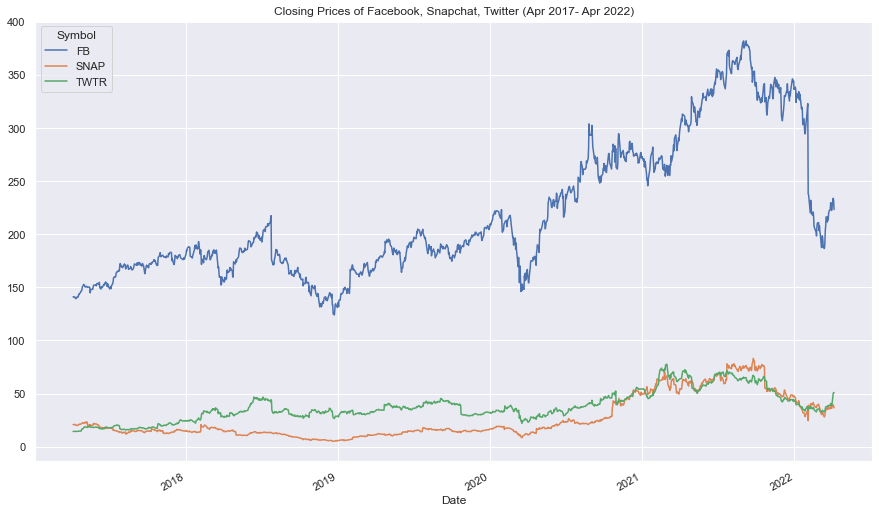

In [106]:
df5.plot(figsize = (15,9), title = 'Closing Prices of Facebook, Snapchat, Twitter (Apr 2017- Apr 2022)')

### Now let's look at the prices of each relative to the others

In [115]:
ratiosFB_SNAP = pd.DataFrame(df5['FB']/df5['SNAP'])
ratiosFB_SNAP.rename(columns = {0:'META/SNAP'}, inplace = True)
ratiosFB_SNAP

,META/SNAP
Date,
2017-04-06,6.862907
2017-04-07,6.761768
2017-04-10,6.725799
2017-04-11,6.759420
2017-04-12,6.903067
...,...
2022-03-31,6.178383
2022-04-01,6.013640
2022-04-04,5.945348


In [117]:
ratiosFB_TWTR = pd.DataFrame(df5['FB']/df5['TWTR'])
ratiosFB_TWTR.rename(columns = {0:'META/TWTR'}, inplace = True)
ratiosFB_TWTR

,META/TWTR
Date,
2017-04-06,9.810285
2017-04-07,9.851644
2017-04-10,9.821727
2017-04-11,9.777777
2017-04-12,9.679612
...,...
2022-03-31,5.747222
2022-04-01,5.719919
2022-04-04,4.680608


<AxesSubplot:title={'center':'Meta to Twitter Closing Price Ratio (4/2017-4/2022)'}, xlabel='Date'>

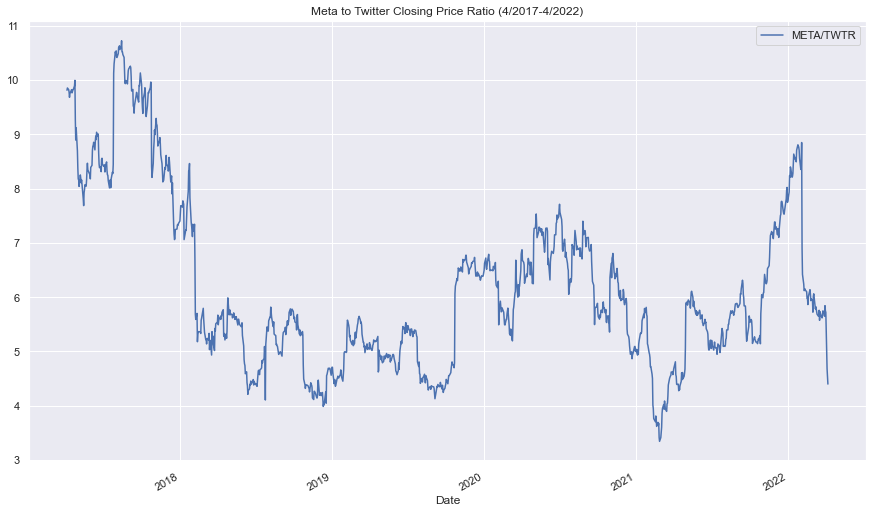

In [118]:
ratiosFB_TWTR.plot(figsize = (15,9), title = 'Meta to Twitter Closing Price Ratio (4/2017-4/2022)')

<AxesSubplot:title={'center':'Meta to Snapchat Closing Price Ratio (4/2017-4/2022)'}, xlabel='Date'>

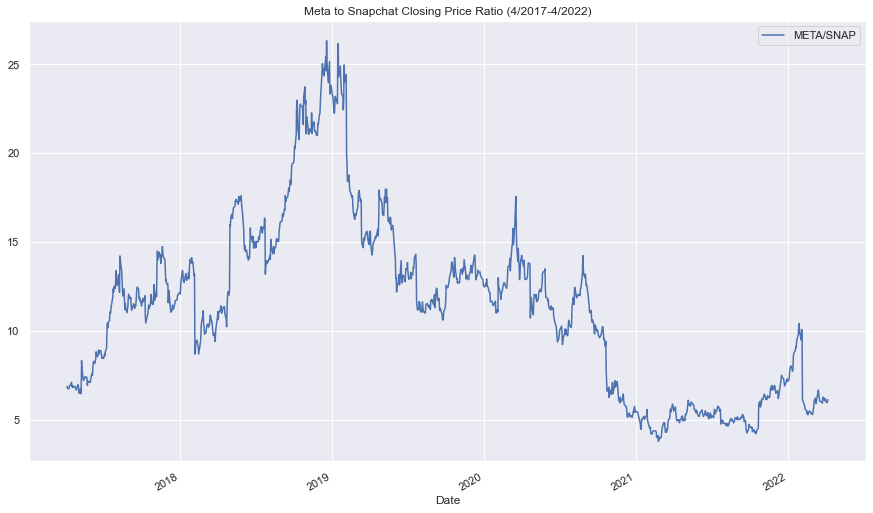

In [119]:
ratiosFB_SNAP.plot(figsize = (15,9), title = 'Meta to Snapchat Closing Price Ratio (4/2017-4/2022)')

In [125]:
ratiosSNAP_TWTR = pd.DataFrame(df5['TWTR']/df5['SNAP'])
ratiosSNAP_TWTR.rename(columns = {0:'TWTR_SNAP'}, inplace = True)
ratiosSNAP_TWTR

,TWTR_SNAP
Date,
2017-04-06,0.699562
2017-04-07,0.686359
2017-04-10,0.684788
2017-04-11,0.691304
2017-04-12,0.713155
...,...
2022-03-31,1.075021
2022-04-01,1.051351
2022-04-04,1.270208


<AxesSubplot:title={'center':'TWTR to SNAP Closing Price Ratio (4/2017-4/2022)'}, xlabel='Date'>

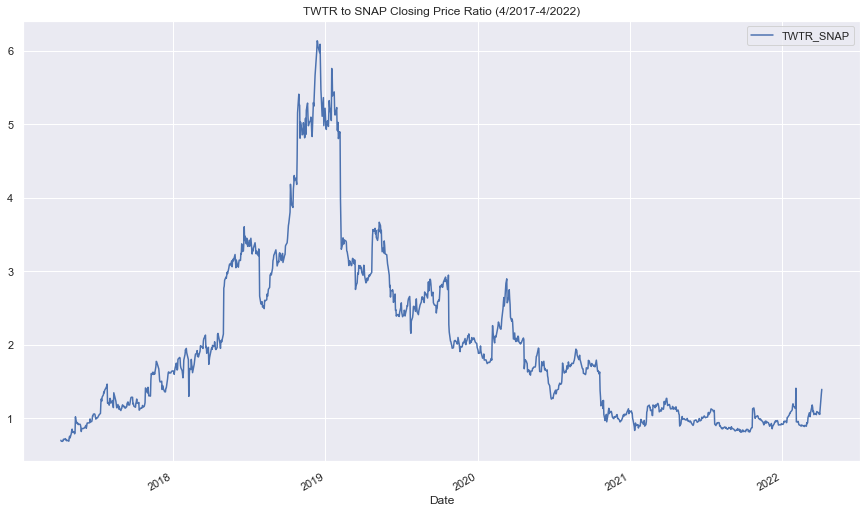

In [126]:
ratiosSNAP_TWTR.plot(figsize = (15,9), title = 'TWTR to SNAP Closing Price Ratio (4/2017-4/2022)')

## Broad remarks

All 3 social media companies tend to follow the same general trends as each other, with significant growth between early 2020 and late 2021, before dropping off. Similarly between mid 2018 and late 2020, Snapchats relative value to Meta and Twitter decreased dramatically, with a peak discrepancy occuring between late 2018 and early 2019.

In [103]:
from sklearn import preprocessing

x = df5.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dfs = pd.DataFrame(x_scaled)

In [104]:
dfs

,0,1,2
0,0.066287,0.199437,0.001579
1,0.064776,0.202637,0.000000
2,0.065783,0.204557,0.001105
3,0.061444,0.201101,0.000316
4,0.060127,0.194956,0.002052
...,...,...,...
1255,0.380831,0.396825,0.385223
1256,0.390477,0.414747,0.395011
1257,0.425500,0.439708,0.563309
1258,0.417558,0.425755,0.579255


In [121]:
dfs.rename(columns = {0:'META',1:'SNAP',2:'TWTR'},inplace = True)

In [124]:
dfs.describe()

,META,SNAP,TWTR
count,1260.000000,1260.000000,1260.000000
mean,0.368292,0.275176,0.371047
std,0.250694,0.255567,0.222845
min,0.000000,0.000000,0.000000
25%,0.184362,0.107527,0.240725
50%,0.262843,0.150922,0.323571
75%,0.552970,0.436604,0.471621
max,1.000000,1.000000,1.000000


<AxesSubplot:title={'center':'Normalized Closing Prices of META/SNAP/TWTR, 2017-2022'}>

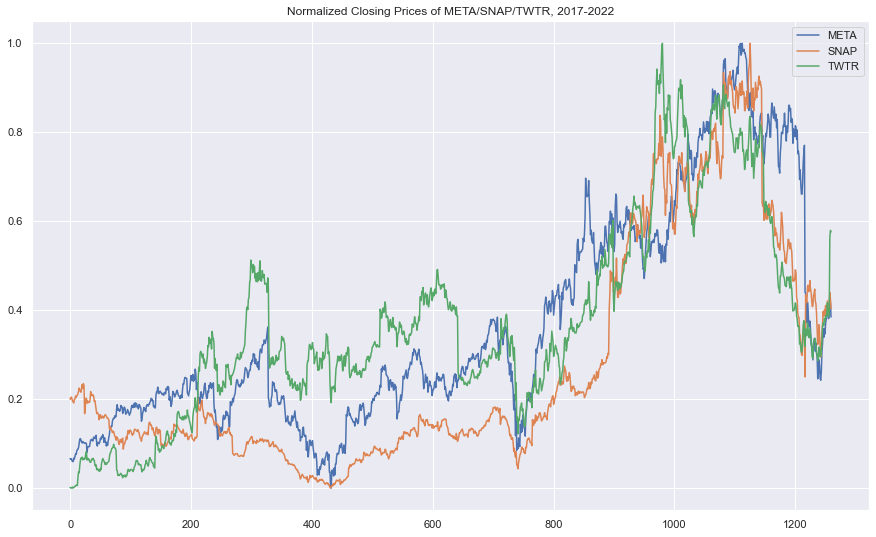

In [123]:
dfs.plot(figsize = (15,9), title ='Normalized Closing Prices of META/SNAP/TWTR, 2017-2022')

In [105]:
dfs.describe()

,0,1,2
count,1260.000000,1260.000000,1260.000000
mean,0.368292,0.275176,0.371047
std,0.250694,0.255567,0.222845
min,0.000000,0.000000,0.000000
25%,0.184362,0.107527,0.240725
50%,0.262843,0.150922,0.323571
75%,0.552970,0.436604,0.471621
max,1.000000,1.000000,1.000000


In [76]:
nasdaq5 = nasdaq[(nasdaq.index >= '2017-04-06') & (nasdaq.index <='2022-04-06')]

In [77]:
nasdaq5

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-06,5870.520020,5889.580078,5856.220215,5878.950195,5878.950195,1845800000
2017-04-07,5873.939941,5892.069824,5855.509766,5877.810059,5877.810059,1692150000
2017-04-10,5883.430176,5907.850098,5865.560059,5880.930176,5880.930176,1630070000
2017-04-11,5871.160156,5878.939941,5819.290039,5866.770020,5866.770020,1821650000
2017-04-12,5863.589844,5868.089844,5830.439941,5836.160156,5836.160156,1658960000
...,...,...,...,...,...,...
2022-03-31,14444.780273,14456.740234,14217.719727,14220.519531,14220.519531,5427030000
2022-04-01,14269.530273,14306.940430,14131.809570,14261.500000,14261.500000,4984050000
2022-04-04,14304.349609,14534.379883,14286.450195,14532.549805,14532.549805,4598480000


In [67]:
all4.head()

,Close,Close,Close,Close
Date,,,,
2012-04-17,NaN,NaN,NaN,3042.820068
2012-04-18,NaN,NaN,NaN,3031.449951
2012-04-19,NaN,NaN,NaN,3007.560059
2012-04-20,NaN,NaN,NaN,3000.449951
2012-04-23,NaN,NaN,NaN,2970.449951


In [79]:
all4.columns = ['f1','f2','f3','nas']

In [41]:
all3.tail()

,Close,Close,Close
Date,,,
2022-03-31,222.360001,38.689999,35.990002
2022-04-01,224.850006,39.310001,37.389999
2022-04-04,233.889999,49.970001,39.340000
2022-04-05,231.839996,50.980000,38.250000
2022-04-06,223.300003,50.770000,36.470001


In [40]:
all4 = pd.concat([all3, nasdaq[['Close']]], axis = 1)
all4

,Close,Close,Close,Close
Date,,,,
2012-04-17,NaN,NaN,NaN,3042.820068
2012-04-18,NaN,NaN,NaN,3031.449951
2012-04-19,NaN,NaN,NaN,3007.560059
2012-04-20,NaN,NaN,NaN,3000.449951
2012-04-23,NaN,NaN,NaN,2970.449951
...,...,...,...,...
2022-04-08,NaN,NaN,NaN,13711.000000
2022-04-11,NaN,NaN,NaN,13411.959961
2022-04-12,NaN,NaN,NaN,13371.570313


<AxesSubplot:xlabel='Date'>

<Figure size 1080x648 with 0 Axes>

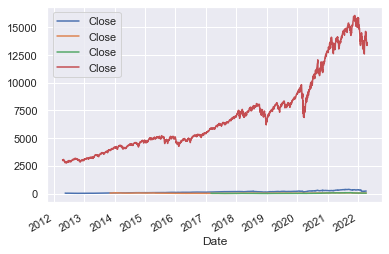

In [54]:
plt.figure(figsize=(15,9))
all4.plot()